In [1]:
import matplotlib.pyplot as plt
from time import time
from simfunctions import *

# Lotka-Volterra

X rabbits
Y foxes

$$ X \xrightarrow{k_1} 2X $$
$$ X + Y \xrightarrow{k_2, k_3} 2Y $$
$$ Y \xrightarrow{k_4} \emptyset $$

with parameter $k_1 = 1.1, k_2 = 0.4, k_3 = 0.1, k_4 = 0.4$.

In [2]:
def rate1(X):
    rate = X[0]
    if rate > 0:
        return rate
    else:
        return 0

def rate2(X):
    rate = X[0]*X[1]
    if rate > 0:
        return rate
    else:
        return 0

def rate3(X):
    rate = X[1]
    if rate > 0:
        return rate
    else:
        return 0
    
    
# Model Parameters
drift = [rate1, rate2, rate3]
S_matrix = np.array([[1, 0], [-1, 1], [0, -1]])  # Stoichiometry matrix
c = np.array([10, 0.01, 10])  # Reaction rates
X0 = np.array([1000, 1000])  # Initial state
T = 2  # Total time


## SSA

In [3]:
n_runs = 10
runs = []

for run in range(n_runs):
    if 100*run/n_runs % 10 == 0:
        print(100*run/n_runs, '% simulations completed')
    X = None
    while X is None:
        X, t_ssa = next_reaction(drift, S_matrix, c, X0, T)
    runs.append(X)
    
x_ssa = np.mean(np.array(runs), axis=0)


0.0 % simulations completed
10.0 % simulations completed
20.0 % simulations completed
30.0 % simulations completed
40.0 % simulations completed
50.0 % simulations completed
60.0 % simulations completed
70.0 % simulations completed
80.0 % simulations completed
90.0 % simulations completed


In [4]:
np.array(runs)

array([[[1000, 1000],
        [ 999,  985],
        [1002,  981],
        ...,
        [1193, 1055],
        [1179, 1076],
        [1179, 1077]],

       [[1000, 1000],
        [1000, 1009],
        [ 991, 1006],
        ...,
        [1003, 1052],
        [1005, 1046],
        [1026, 1027]],

       [[1000, 1000],
        [1009, 1010],
        [1003, 1010],
        ...,
        [ 941,  995],
        [ 951,  988],
        [ 975,  974]],

       ...,

       [[1000, 1000],
        [1003,  979],
        [1005,  980],
        ...,
        [ 827, 1183],
        [ 819, 1170],
        [ 798, 1168]],

       [[1000, 1000],
        [ 989, 1008],
        [ 994, 1006],
        ...,
        [ 986, 1311],
        [ 983, 1304],
        [ 967, 1313]],

       [[1000, 1000],
        [1002,  999],
        [ 998, 1006],
        ...,
        [1206, 1048],
        [1194, 1063],
        [1184, 1078]]])

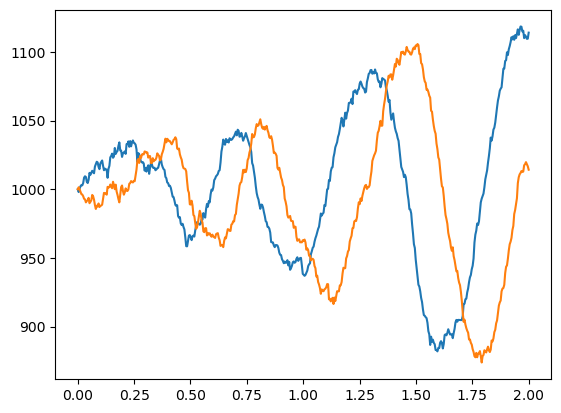

In [5]:
plt.plot(t_ssa, x_ssa)

## Tau-leaping

In [6]:
tau = 0.01  # Leap size

n_runs = 100
runs = []

for run in range(n_runs):
    if 100*run/n_runs % 10 == 0:
        print(100*run/n_runs, '% simulations completed')
    X = None
    while X is None:
        X, t_tau = tau_leaping(drift, S_matrix, c, X0, T, tau)
    runs.append(X)
    
print('Number of steps: ', len(X))

0.0 % simulations completed
[100. 100. 100.]
[99.7    99.5006 99.8   ]
[ 98.6     99.2902 100.7   ]
[ 95.1     97.4775 102.5   ]
[ 96.8     97.6712 100.9   ]
[ 94.9     96.3235 101.5   ]
[ 94.9     95.3745 100.5   ]
[96.3    94.8555 98.5   ]
[95.4    93.6828 98.2   ]
[92.    90.528 98.4  ]
[91.7    89.0407 97.1   ]
[93.    90.117 96.9  ]
[95.    87.495 92.1  ]
[95.4    87.4818 91.7   ]
[94.8   88.164 93.   ]
[96.1    89.5652 93.2   ]
[96.4   90.134 93.5  ]
[97.   92.15 95.  ]
[99.8    94.5106 94.7   ]
[98.8  93.86 95.  ]
[102.1     97.5055  95.5   ]
[101.6     98.8568  97.3   ]
[102.    97.92  96.  ]
[104.1    100.1442  96.2   ]
[105.6   102.432  97.   ]
[107.9    104.5551  96.9   ]
[107.3    106.4416  99.2   ]
[106.9    109.4656 102.4   ]
[105.8    110.6668 104.6   ]
[101.7    108.5139 106.7   ]
[101.8   109.435 107.5  ]
[103.5    110.0205 106.3   ]
[102.3    108.8472 106.4   ]
[ 98.    106.134 108.3  ]
[ 98.8    104.4316 105.7   ]
[ 98.1    106.1442 108.2   ]
[100.4    109.2352 108.8

In [7]:
std_tau = np.std(runs, axis=0)[:,0]

In [8]:
np.mean(runs, axis=0)[:,0]**2 + np.var(runs, axis=0)[:,0]

array([1000000.  , 1000863.03, 1000250.58,  990843.81,  985373.07,
        981060.05,  982109.13,  985449.  ,  984205.7 ,  985094.  ,
        983161.97,  985799.5 ,  988834.37,  987177.35,  988688.11,
        993932.61,  992297.71,  995188.  ,  999008.31, 1003482.98,
       1006903.39, 1009336.58, 1011582.56, 1016934.36, 1018662.02,
       1018408.58, 1020674.51, 1022321.09, 1024965.04, 1027357.64,
       1029574.5 , 1029707.8 , 1029138.49, 1026751.49, 1026631.56,
       1023520.04, 1020709.51, 1018174.27, 1014611.17, 1013617.24,
       1015039.67, 1014118.96, 1011984.63, 1008112.02, 1007164.44,
       1002108.71, 1002577.44,  993680.94,  986177.56,  979484.28,
        977495.66,  974166.42,  975790.81,  978563.11,  976723.46,
        978856.08,  981530.25,  983031.77,  983444.51,  991707.61,
        997134.94,  998032.63,  994570.44, 1000066.28, 1010292.67,
       1013207.58, 1015013.03, 1025743.96, 1037037.41, 1043196.72,
       1045855.61, 1054339.78, 1054654.91, 1057498.96, 1063787

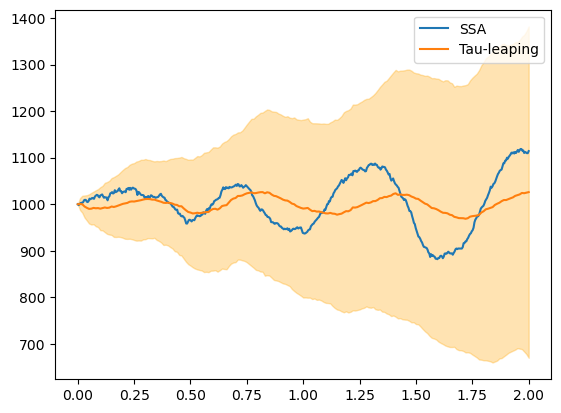

In [9]:
x_tau = np.mean(runs, axis=0)

plt.plot(t_ssa, x_ssa[:,0], label='SSA')
plt.plot(t_tau, x_tau[:,0], label='Tau-leaping')
plt.fill_between(t_tau, x_tau[:,0]-std_tau, x_tau[:,0]+std_tau ,alpha=0.3, color='orange')
plt.legend()

## Mean-field

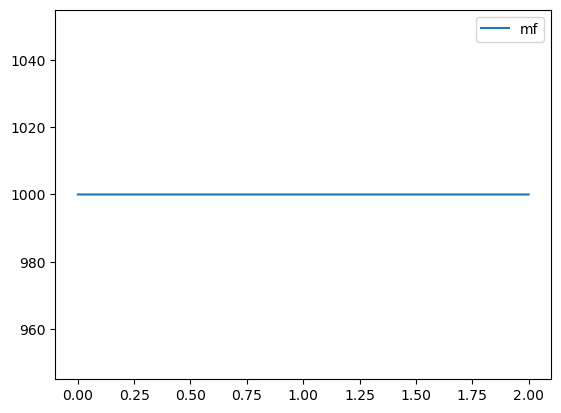

In [10]:

tmf = np.linspace(0,T, 5000)
Xmf = mean_field(drift,S_matrix,c,X0,tmf)

#plt.plot(t_ssa, x_ssa[:,0], label='SSA')
#plt.plot(t_tau, x_tau[:,0], label='Tau-leaping')
plt.plot(tmf, Xmf[:,0], label='mf')
plt.legend()


## SOGA 

In [11]:
from sogaPreprocessor import *
from producecfg import *
from libSOGA import *

compiledFile=compile2SOGA('../programs/SOGA/SSA/LotkaVolterra.soga')
cfg = produce_cfg(compiledFile)
start = time()
output_dist = start_SOGA(cfg)
end = time()

print('Computed in {}s'.format(np.round(end-start,3)))

ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.

/Users/rominadoz/Desktop/Home/SOGA4SSA/src/libSOGAupdate.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  pois_it[k_val] = 1 - norm.cdf(-muprime/pois_sigma)
/Users/rominadoz/Desktop/Home/SOGA4SSA/src/libSOGAupdate.py:29: RuntimeWarning: divide by zero encountered in scalar divide
  pois_it[k_val] = muprime*pois_it[k_val-1] + pois_sigma*norm.pdf(-muprime/pois_sigma)
/Users/rominadoz/Desktop/Home/SOGA4SSA/src/libSOGAupdate.py:34: RuntimeWarning: invalid value encountered in divide
  pois_it = pois_it/sum(pois_it)


[1. 0.] [ 0. inf] [0. 0.]
----------------------
[0. 1.] [inf inf] [inf inf]
----------------------
[0. 1.] [inf inf] [inf inf]
----------------------
[1. 0.] [ 0. inf] [0. 0.]
----------------------
[1. 0.] [ 0. inf] [0. 0.]
----------------------
[0. 1.] [inf inf] [inf inf]
----------------------
[0. 1.] [inf inf] [inf inf]
----------------------
[1.9979285e-17 1.0000000e+00] [1.22075516e+02 2.95114624e+08] [1.98454990e+01 1.07681914e+05]
----------------------
[1.9979285e-17 1.0000000e+00] [1.22075516e+02 2.95114624e+08] [1.98454990e+01 1.07681914e+05]
----------------------
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
ANTLR runtime and generated code versions disagree: 4.13.1!=4.10.1
[4.332311e-18 1.000000e+00] [1.1747184e+03 1.0504067e+08] [   51.199364 31683.525   ]
----------------------
[4.332311e-18 1.000000e+00] [1.1747184e+03 1.0504067e+08] [   51.199364 31683.525   ]
----------------------
[4.332311e-18 1.000000e+00] [1.1747184e+03 1.0504067e+08] [   5

: 

In [11]:
t = len(t_tau)

x1 = np.zeros(t)
x2 = np.zeros(t)
std1 = np.zeros(t)
std2 = np.zeros(t)

for i in range(t):
    idx1 = output_dist.var_list.index('X1[{}]'.format(i))
    idx2 = output_dist.var_list.index('X2[{}]'.format(i))
    x1[i] = output_dist.gm.mean()[idx1]
    std1[i] = np.sqrt(output_dist.gm.cov()[idx1,idx1])
    x2[i] = output_dist.gm.mean()[idx2]
    std2[i] = np.sqrt(output_dist.gm.cov()[idx2,idx2])

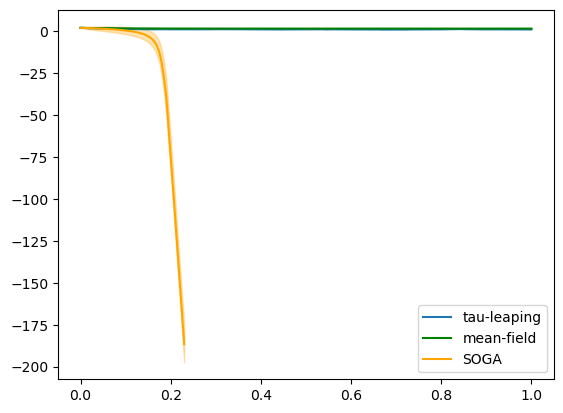

In [12]:
plt.plot(t_tau, x_tau[:,0], label='tau-leaping')
plt.plot(tmf, Xmf[:,0], label='mean-field', color='green')
plt.plot(t_tau, x1, label='SOGA', color='orange')
plt.fill_between(t_tau, x1-std1, x1+std1 ,alpha=0.3, color='orange')
plt.legend()

In [11]:
pois_mu = 325.4938460168556 
pois_sigma = 2199.1139286691114 
supp = 10

poisson_var(pois_mu, pois_sigma, supp, 'mom1')

([1.0], [nan], [nan])

In [23]:
std_tau

array([0.        , 0.40926764, 0.44676616, 0.57758116, 0.6636264 ,
       0.73484692, 0.77614432, 0.79113842, 0.79617837, 0.86827415,
       0.93680307, 0.94503968, 0.95205042, 0.95262794, 1.00419122,
       1.05337553, 1.05337553, 1.07870292, 1.09343495, 1.08531102,
       1.10140819, 1.11821286, 1.09886305, 1.09745159, 1.10503394,
       1.1017713 , 1.06414285, 1.05692952, 1.10503394, 1.13714555,
       1.14799826, 1.12334322, 1.08830143, 1.04589674, 1.0219589 ,
       1.03319892, 0.98873657, 0.97339612, 0.96041658, 0.95477746,
       0.9591663 , 0.94926287, 1.00019998, 0.9593748 , 0.93696318,
       0.90658701, 0.9       , 0.87057452, 0.86133617, 0.84113019,
       0.8357033 , 0.8842511 , 0.92195445, 0.9283857 , 0.9313968 ,
       0.90465463, 0.94968416, 0.98645831, 0.97652445, 0.98488578,
       0.96015624, 0.89727365, 0.89241246, 0.89241246, 0.81240384,
       0.85293611, 0.8842511 , 0.94106323, 0.91301698, 0.89949986,
       0.91098847, 0.89442719, 0.88876319, 0.9162969 , 0.92146

In [24]:
std1

array([ 0.        ,  0.36055513,  0.51599724,  0.64382892,  0.75831839,
        0.86445664,  0.96467658,  1.06039367,  1.1525382 ,  1.2417851 ,
        1.32866857,  1.41364569,  1.49713501,  1.57954218,  1.6612787 ,
        1.74277733,  1.82450623,  1.90698357,  1.99079392,  2.07660792,
        2.16520704,  2.25751573,  2.35464431,  2.45794775,  2.56910778,
        2.69025073,  2.82412116,  2.97434519,  3.14584399,  3.34550883,
        3.58335484,  3.87460243,  4.24367857,  4.73245576,  5.41777399,
        6.43824142,  7.91476261,  9.53865238, 10.98805817, 10.9760386 ,
       10.97027323, 10.967259  , 10.96067326, 10.95404975, 10.94708907,
       10.93964255, 10.9316355 ,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,      